In [1]:
# Uploading common packages.

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:

#!pip install xgboost
#!pip install lightgbm

In [3]:
#!pip install dabl
import dabl #Data Analysis and ML Automation
import scipy.stats as stats
import sklearn.linear_model as linear_model
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from numpy import absolute
from sklearn.datasets import make_regression

In [5]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
#!pip install mlxtend
from mlxtend.regressor import StackingCVRegressor

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
#!pip install yellowbrick
#There is a problem with importing safe_indexing in sklearn 0.24.

In [7]:
#from yellowbrick.model_selection import ValidationCurve #Machine learning visualization package

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split as tts
#from yellowbrick.regressor import ResidualsPlot
#from yellowbrick.regressor import PredictionError

In [9]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error

%matplotlib inline

pd.pandas.set_option('display.max_columns', None)

import warnings

In [10]:
#load dataset we are going to use 

train = pd.read_csv('https://raw.githubusercontent.com/jdcimadoro/House-Prices-Regression/main/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/jdcimadoro/House-Prices-Regression/main/test.csv')

The first step is Exploratory Data Analysis.

In [11]:
#see samples on train dataset

train.head()

#We store Id features in a variables and will use them to send predictions to the leaderboard.

train_ID = train['Id']
test_ID = test['Id']

In [12]:
#see the shapes of training and testing datasets

print('Training set shape:', train.shape)
print('Testing set shape:', test.shape)

Training set shape: (1460, 81)
Testing set shape: (1459, 80)


In [13]:
# Now drop the  'Id' colum since it's unnecessary for  the prediction process.

train.drop(['Id'], axis=1, inplace=True)
test.drop(['Id'], axis=1, inplace=True)

/home/j/anaconda3/lib/python3.7/site-packages/dabl/plot/supervised.py:540: FutureWarning: The second positional argument of plot is a Series 'y'. If passing a column name, use a keyword.
  FutureWarning)
/home/j/anaconda3/lib/python3.7/site-packages/dabl/preprocessing.py:352: UserWarning: Discarding near-constant features: ['Street', 'Utilities', 'Condition2', 'RoofMatl', 'Heating', 'LowQualFinSF', 'KitchenAbvGr', 'GarageQual', 'GarageCond', '3SsnPorch', 'PoolArea', 'MiscVal']
  near_constant.index[near_constant].tolist()))


Target looks like regression
Showing only top 10 of 22 continuous features


/home/j/anaconda3/lib/python3.7/site-packages/dabl/plot/utils.py:630: UserWarning: Dropped 3 outliers in column GrLivArea.
  int(dropped), series.name), UserWarning)
/home/j/anaconda3/lib/python3.7/site-packages/dabl/plot/utils.py:630: UserWarning: Dropped 1 outliers in column TotalBsmtSF.
  int(dropped), series.name), UserWarning)
/home/j/anaconda3/lib/python3.7/site-packages/dabl/plot/utils.py:630: UserWarning: Dropped 3 outliers in column 1stFlrSF.
  int(dropped), series.name), UserWarning)
/home/j/anaconda3/lib/python3.7/site-packages/dabl/plot/utils.py:630: UserWarning: Dropped 2 outliers in column MasVnrArea.
  int(dropped), series.name), UserWarning)


Showing only top 10 of 45 categorical features


/home/j/anaconda3/lib/python3.7/site-packages/dabl/plot/utils.py:373: UserWarning: FixedFormatter should only be used together with FixedLocator
  for t in ax.get_xticklabels()]
/home/j/anaconda3/lib/python3.7/site-packages/dabl/plot/utils.py:373: UserWarning: FixedFormatter should only be used together with FixedLocator
  for t in ax.get_xticklabels()]
/home/j/anaconda3/lib/python3.7/site-packages/dabl/plot/utils.py:373: UserWarning: FixedFormatter should only be used together with FixedLocator
  for t in ax.get_xticklabels()]
/home/j/anaconda3/lib/python3.7/site-packages/dabl/plot/utils.py:373: UserWarning: FixedFormatter should only be used together with FixedLocator
  for t in ax.get_xticklabels()]
/home/j/anaconda3/lib/python3.7/site-packages/dabl/plot/utils.py:373: UserWarning: FixedFormatter should only be used together with FixedLocator
  for t in ax.get_xticklabels()]
/home/j/anaconda3/lib/python3.7/site-packages/dabl/plot/utils.py:373: UserWarning: FixedFormatter should only 

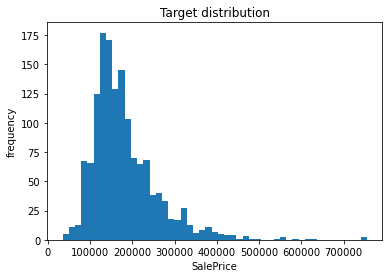

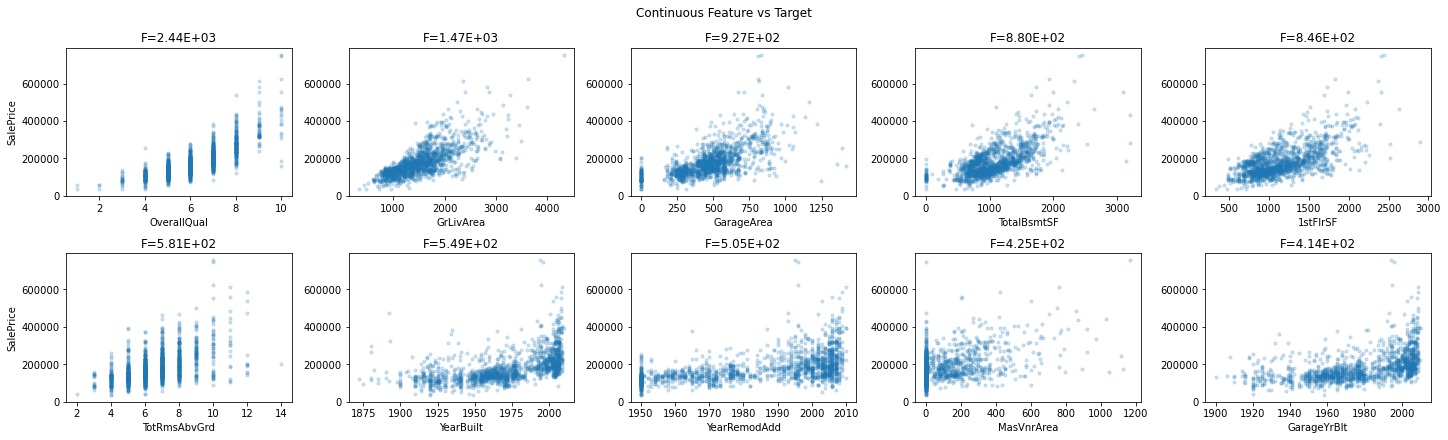

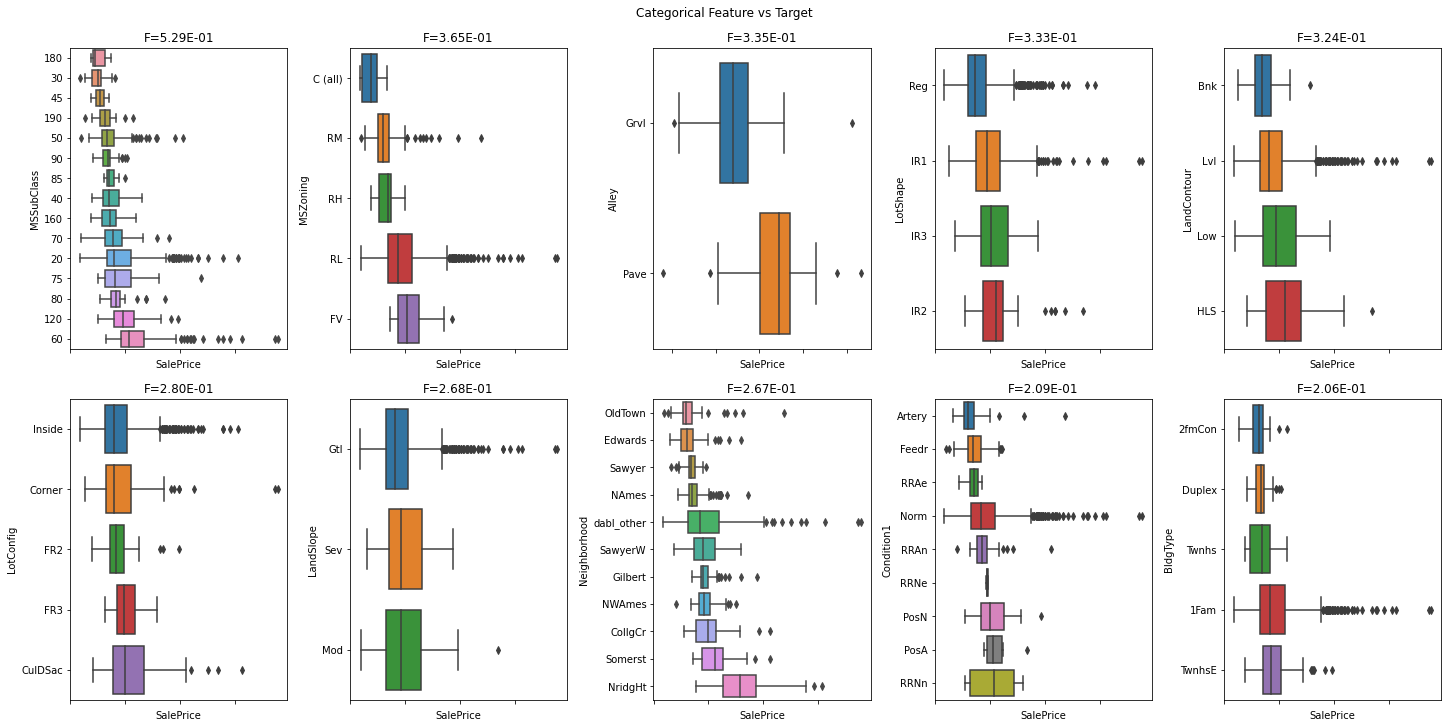

In [14]:
#Automatically plots for performing EDA and detect anomalies in dataset

### However, we are not going to do this for testing dataset and after because even though we detect anomalies in testing set,
# we could not delete rows with such anomalies.

dabl.plot(train, 'SalePrice')

In [15]:
#see the training set structure

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [16]:
#For finding "SalePrice" distribution

#fc = dabl.AnyClassifier()
#X = train.drop('SalePrice', axis=1)
#y = train.SalePrice
#fc.fit(X, y)
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [17]:
#Some of the features are seen as numericals and they may be categoricals and others must be datetypes and they are numericals. So we transform them.

train['GarageYrBlt'].fillna(train['GarageYrBlt'].mode()[0], inplace=True)
train['GarageDateBlt'] = pd.to_datetime(train['GarageYrBlt'], format='%Y') 

train.drop(["GarageYrBlt"], axis = 1, inplace = True) 

train['MSSubClass'] = train['MSSubClass'].apply(str)
train['YrSold'] = train['YrSold'].astype(str)
train['MoSold'] = train['MoSold'].astype(str)

train['DateBuilt'] = pd.to_datetime(train['YearBuilt'], format='%Y') 


train['DateSold'] = pd.to_datetime(train['YrSold'], format='%Y') 


train['DateRemodAdd'] = pd.to_datetime(train['YearRemodAdd'], format='%Y') 

train.drop(["YearBuilt", "YrSold", "YearRemodAdd"], axis = 1, inplace = True) 

In [18]:
#Some of the features are seen as numericals and they may be categoricals and others must be datetypes and they are numericals. So we transform them.

test['GarageYrBlt'].fillna(test['GarageYrBlt'].mode()[0], inplace=True)
test['GarageDateBlt'] = pd.to_datetime(test['GarageYrBlt'], format='%Y') 

test.drop(["GarageYrBlt"], axis = 1, inplace = True) 

test['MSSubClass'] = test['MSSubClass'].apply(str)
test['YrSold'] = test['YrSold'].astype(str)
test['MoSold'] = test['MoSold'].astype(str)

test['DateBuilt'] = pd.to_datetime(test['YearBuilt'], format='%Y') 


test['DateSold'] = pd.to_datetime(test['YrSold'], format='%Y') 


test['DateRemodAdd'] = pd.to_datetime(test['YearRemodAdd'], format='%Y') 

test.drop(["YearBuilt", "YrSold", "YearRemodAdd"], axis = 1, inplace = True) 

In [19]:
#Function for finding numerical and categorical features

def characteristics(dataset):
    print('Shape of the dataset: {}'.format(dataset.shape))
    dataset_numerical = dataset.select_dtypes(include = [np.number])
    print('Number of Numerical Features: {}'.format(dataset_numerical.shape[1]))
    dataset_categorical = dataset.select_dtypes(exclude = [np.number])
    print('Number of Categorical Features: {}'.format(dataset_categorical.shape[1]))

In [20]:
characteristics(train)

Shape of the dataset: (1460, 80)
Number of Numerical Features: 31
Number of Categorical Features: 49


In [21]:
characteristics(test)

Shape of the dataset: (1459, 79)
Number of Numerical Features: 30
Number of Categorical Features: 49


In [22]:
#Variables for storing numerical and categoricals features in training dataset

numerical_train = train.select_dtypes(include = [np.number])
numerical_features = numerical_train.columns

categorical_train = train.select_dtypes(exclude = [np.number])
categorical_features = categorical_train.columns

In [23]:
#Variables for storing numerical and categoricals features in testing dataset

numerical_test = test.select_dtypes(include = [np.number])
numerical_features = numerical_test.columns

categorical_test = test.select_dtypes(exclude = [np.number])
categorical_features = categorical_test.columns

In [24]:
# Deleting features with more than 96% of common values in both dataset because these features won't be efficient to predict "SalePrice".

overfit_categorical_train = []
for i in categorical_train:
    counts = train[i].value_counts()
    zeros = counts.iloc[0]
    if zeros / len(train) * 100 > 96:
        overfit_categorical_train.append(i)

overfit_categorical_train = list(overfit_categorical_train)
test = test.drop(overfit_categorical_train, axis=1)
train = train.drop(overfit_categorical_train, axis=1)

In [25]:
overfit_numerical_train = []
for i in numerical_train:
    counts = train[i].value_counts()
    zeros = counts.iloc[0]
    if zeros / len(train) * 100 > 96:
        overfit_numerical_train.append(i)

overfit_numerical_train = list(overfit_numerical_train)
test = test.drop(overfit_numerical_train, axis=1)
train = train.drop(overfit_numerical_train, axis=1)

In [26]:
print("Categorical Features with >96% of the same value: ",overfit_categorical_train)
print("Numerical Features with >96% of the same value: ",overfit_numerical_train)

Categorical Features with >96% of the same value:  ['Street', 'Utilities', 'Condition2', 'RoofMatl', 'Heating']
Numerical Features with >96% of the same value:  ['LowQualFinSF', '3SsnPorch', 'PoolArea', 'MiscVal']


In [27]:
print('Training set shape is now :', train.shape)

Training set shape is now : (1460, 71)


In [28]:
print('Testing set shape is now :', test.shape)

Testing set shape is now : (1459, 70)


In [29]:
#Variables for storing numerical and categoricals features in training dataset

numerical_train = train.select_dtypes(include = [np.number])
numerical_features = numerical_train.columns
categorical_train = train.select_dtypes(exclude = [np.number])
categorical_features = categorical_train.columns

In [30]:
#Variables for storing numerical and categoricals features in testing dataset

numerical_test = test.select_dtypes(include = [np.number])
numerical_features = numerical_test.columns

categorical_test = test.select_dtypes(exclude = [np.number])
categorical_features = categorical_test.columns

# Outliers detection


#### The presence of outliers in a classifcation or regression dataset can result in a poor fit and lower predictive modeling performance.<br> In that way, we have to treat them effectively before modeling.<br>

#### The first thing to do when we want to see if there are outliers in our training dataset is to plot all variables in but we are not going <br>to perform outliers detection on our testing dataset.

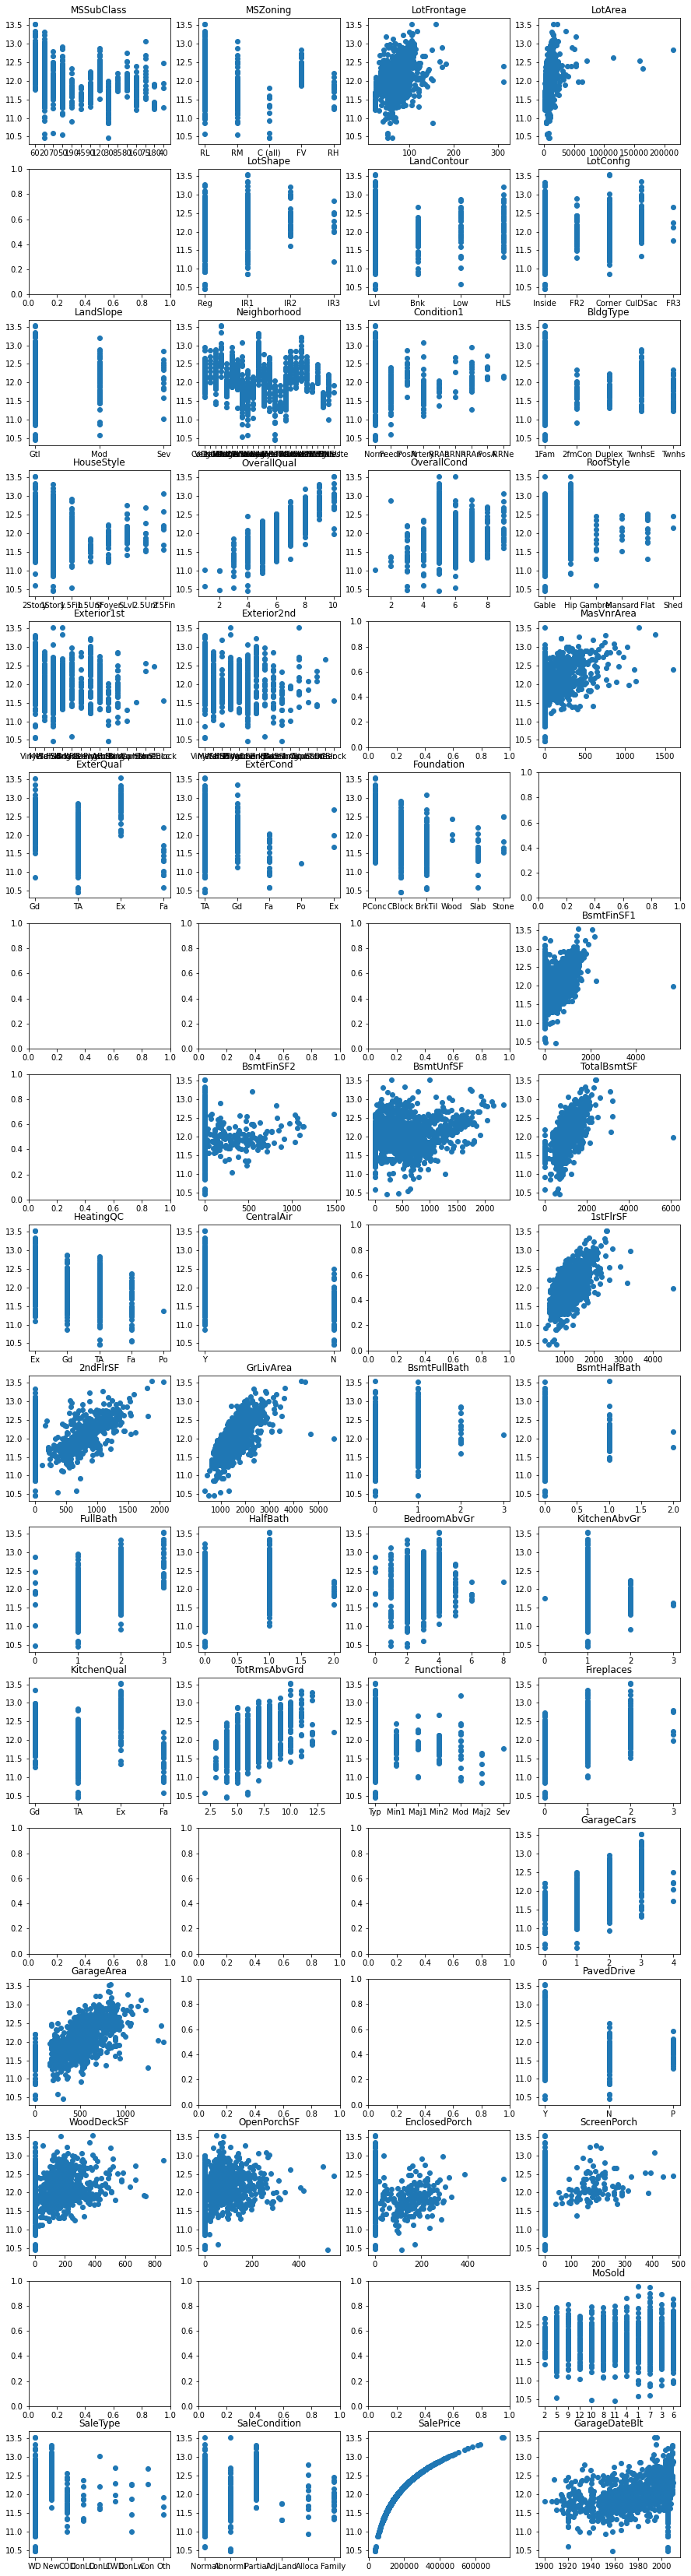

In [31]:
#Plots for helping determine outliers

train.shape[1]
#a = int(np.sqrt(train.shape[1]))
a = 4
b = int(train.shape[1]/4)
r = int(train.shape[1]/a)
c = int(train.shape[1]/b)
i = 0
fig, ax = plt.subplots(nrows=r, ncols=c, figsize=(15, 60))
for row in ax:
    for col in row:
        try:
            col.scatter(x = train[train.columns[i]], y = np.log(train['SalePrice']))
            col.title.set_text(train.columns[i])
        except:
            temp=1
        #except Exception as e:
        #    print(e.message, e.args)
        finally:
            temp=1
        i = i + 1
        
plt.show()

#### As seen with plots, we have several outliers in our training dataset<br>
#### I will read plots and delete rows manually when certains conditions are not repected;<br>

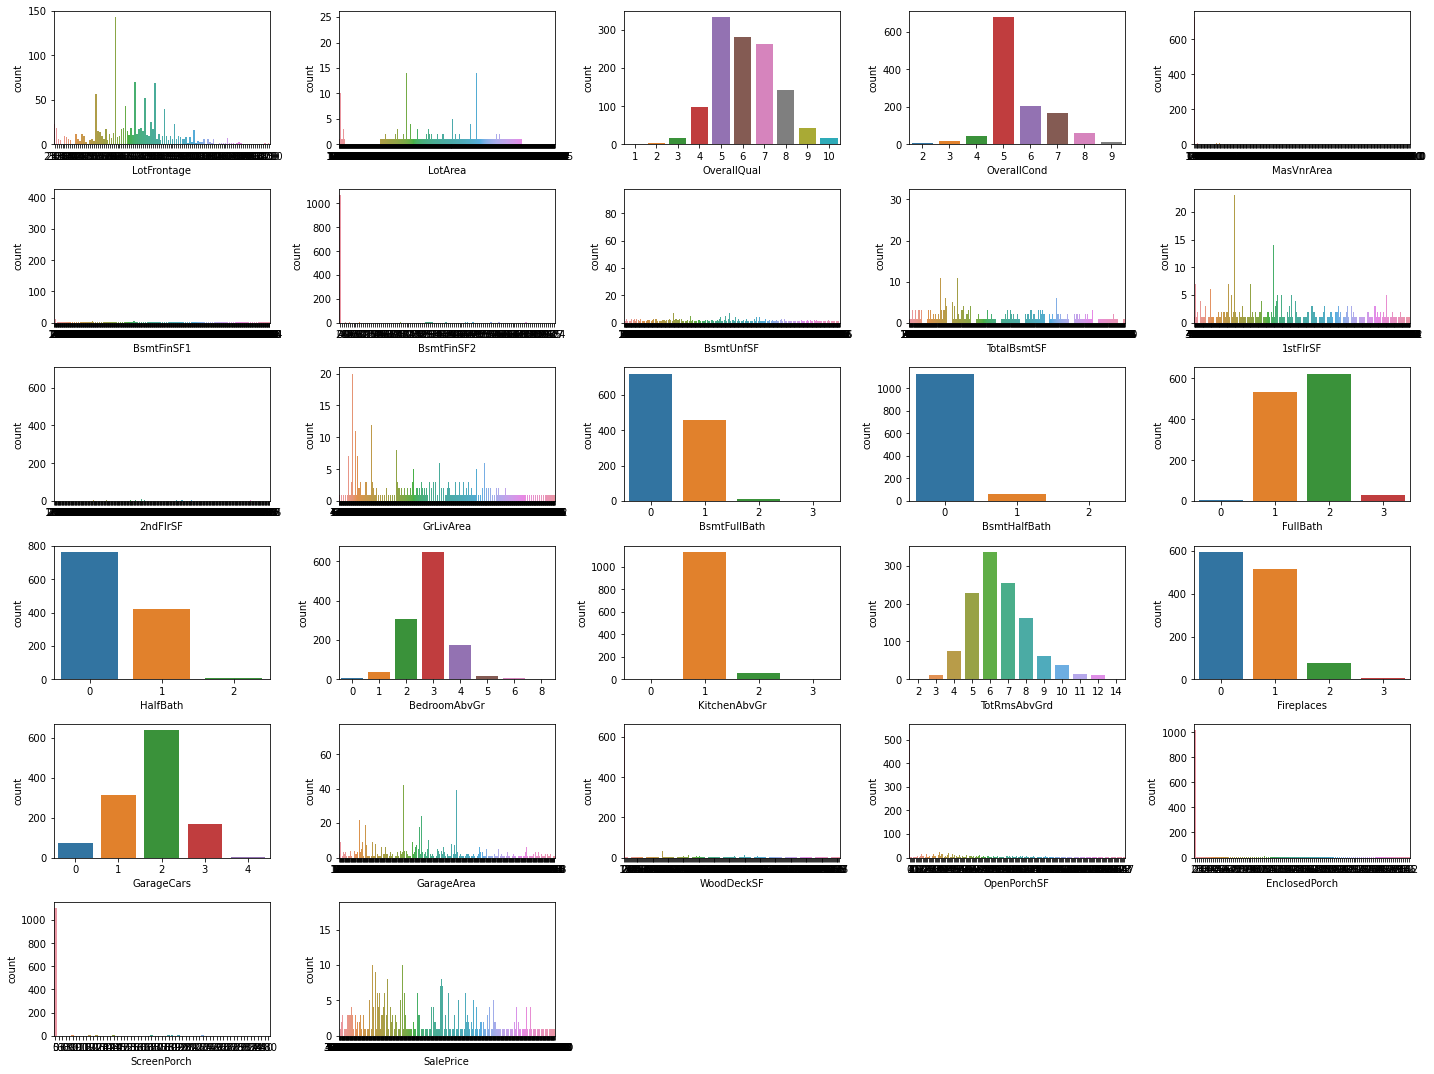

In [32]:
#This is a heavy plot, be patient.
fig = plt.figure(figsize=(20,15))
for index,col in enumerate(numerical_train):
    plt.subplot(6,5,index+1)
    sns.countplot(x=col, data=numerical_train.dropna())
fig.tight_layout(pad=1.0)

In [33]:
train = train.drop(train[train['LotFrontage'] > 200].index)
train = train.drop(train[train['LotArea'] > 100000].index)
train = train.drop(train[train['BsmtFinSF1'] > 4000].index)
train = train.drop(train[train['TotalBsmtSF'] > 5000].index)
train = train.drop(train[train['GrLivArea'] > 4000].index)
train = train.drop(train[train['EnclosedPorch'] > 401].index)
train.reset_index(drop=True, inplace=True)

In [34]:
trt = train.copy()
outliers = []

outliers.append(trt[trt['1stFlrSF']>2700][trt['SalePrice']<500_000].index)
outliers.append(trt[trt['BsmtFullBath']==3.0].index)
outliers.append(trt[trt['GrLivArea']>3300][trt['SalePrice']<300_000].index)
outliers.append(trt[trt['FullBath']==0.0][trt['SalePrice']>300_000].index)
outliers.append(trt[trt['GarageArea']>1200][trt['SalePrice']<200_000].index)
outliers.append(trt[trt['OpenPorchSF']>500].index)

outliers = [x[0] for x in outliers]
outliers
train.drop(outliers, axis=0, inplace=True)
train.shape

/home/j/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/j/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/j/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/home/j/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


(1444, 71)

In [35]:
def characteristics(dataset):
    print('Shape of the dataset: {}'.format(dataset.shape))
    dataset_numerical = dataset.select_dtypes(include = [np.number])
    print('Number of Numerical Features: {}'.format(dataset_numerical.shape[1]))
    dataset_categorical = dataset.select_dtypes(exclude = [np.number])
    print('Number of Categorical Features: {}'.format(dataset_categorical.shape[1]))

In [36]:
characteristics(train)

Shape of the dataset: (1444, 71)
Number of Numerical Features: 27
Number of Categorical Features: 44


In [37]:
characteristics(test)

Shape of the dataset: (1459, 70)
Number of Numerical Features: 26
Number of Categorical Features: 44


# Handling missing values


### Missing values <br> In that way, we have to treat them effectively before modeling.<br>

In [38]:
train_na = (train.isnull().sum() / len(train)) * 100
train_na = train_na.drop(train_na[train_na == 0].index).sort_values(ascending=False)[:71]
missing_data = pd.DataFrame({'Missing Ratio' :train_na})
missing_data.head(50)

,Missing Ratio
PoolQC,99.722992
MiscFeature,96.468144
Alley,93.698061
Fence,80.747922
FireplaceQu,47.576177
LotFrontage,17.659280
GarageType,5.470914
GarageFinish,5.470914
GarageQual,5.470914
GarageCond,5.470914


Text(0.5, 1.0, 'Percent missing data by feature')

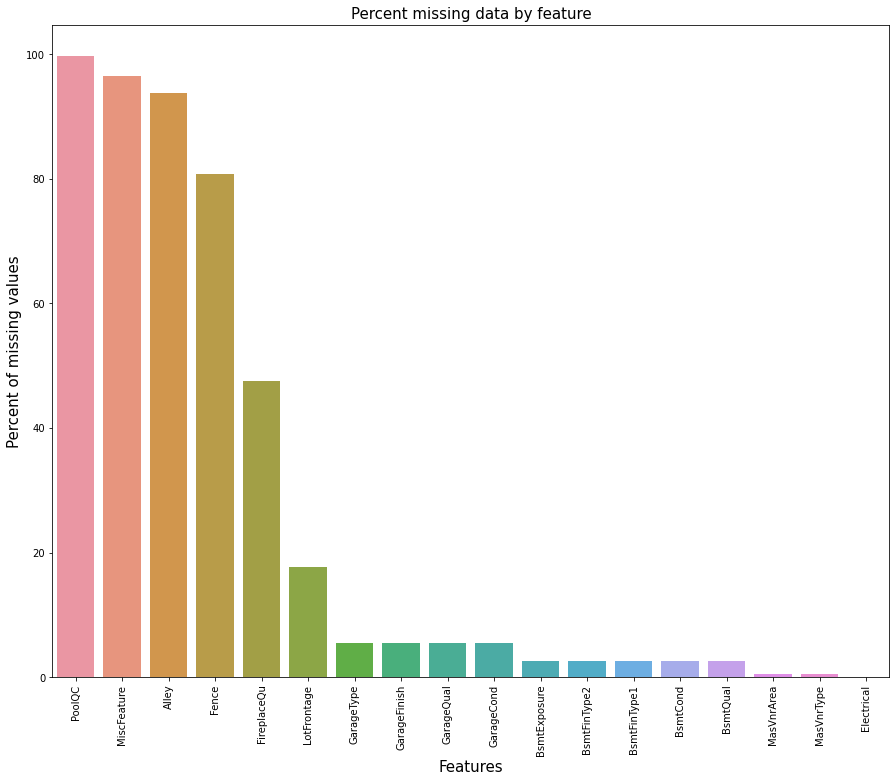

In [39]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=train_na.index, y=train_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [40]:
train["PoolQC"] = train["PoolQC"].fillna("None")
train["MiscFeature"] = train["MiscFeature"].fillna("None")
train["Alley"] = train["Alley"].fillna("None")
train["Fence"] = train["Fence"].fillna("None")
train["FireplaceQu"] = train["FireplaceQu"].fillna("None")
train["MasVnrType"] = train["MasVnrType"].fillna("None")


train["GarageType"] = train["GarageType"].fillna("None")
train["GarageFinish"] = train["GarageFinish"].fillna("None")
train["GarageQual"] = train["GarageQual"].fillna("None")
train["GarageCond"] = train["GarageCond"].fillna("None")
train["BsmtQual"] = train["BsmtQual"].fillna("None")
train["BsmtCond"] = train["BsmtCond"].fillna("None")
train["BsmtExposure"] = train["BsmtExposure"].fillna("None")
train["BsmtFinType1"] = train["BsmtFinType1"].fillna("None")
train["BsmtFinType2"] = train["BsmtFinType2"].fillna("None")

train["LotFrontage"] = train.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

train['GarageCars'] = train['GarageCars'].fillna(0)

train["MasVnrArea"] = train["MasVnrArea"].fillna(0)

train['Electrical'] = train['Electrical'].fillna("Typ")

In [41]:
test_na = (test.isnull().sum() / len(test)) * 100
test_na = test_na.drop(test_na[test_na == 0].index).sort_values(ascending=False)[:71]
missing_data = pd.DataFrame({'Missing Ratio' :test_na})
missing_data.head(50)

,Missing Ratio
PoolQC,99.794380
MiscFeature,96.504455
Alley,92.666210
Fence,80.123372
FireplaceQu,50.034270
LotFrontage,15.558602
GarageCond,5.346127
GarageQual,5.346127
GarageFinish,5.346127
GarageType,5.209047


Text(0.5, 1.0, 'Percent missing data by feature in testing dataset')

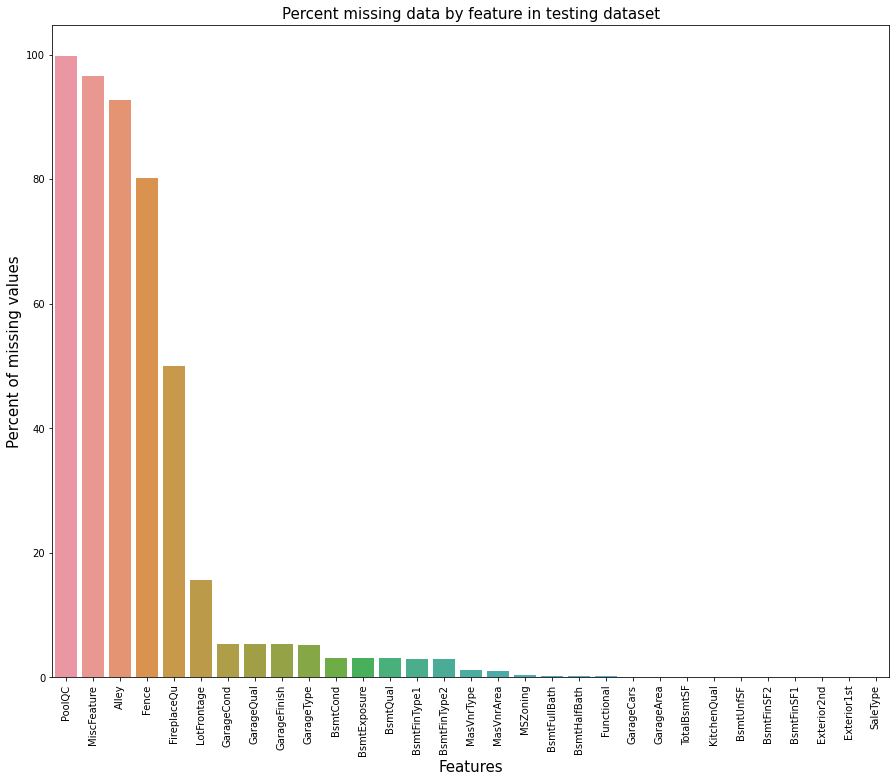

In [42]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=test_na.index, y=test_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature in testing dataset', fontsize=15)

In [43]:
test["PoolQC"] = test["PoolQC"].fillna("None")
test["MiscFeature"] = test["MiscFeature"].fillna("None")
test["Alley"] = test["Alley"].fillna("None")
test["Fence"] = test["Fence"].fillna("None")
test["FireplaceQu"] = test["FireplaceQu"].fillna("None")
test["MasVnrType"] = test["MasVnrType"].fillna("None")


test["GarageType"] = test["GarageType"].fillna("None")
test["GarageFinish"] = test["GarageFinish"].fillna("None")
test["GarageQual"] = test["GarageQual"].fillna("None")
test["GarageCond"] = test["GarageCond"].fillna("None")
test["BsmtQual"] = test["BsmtQual"].fillna("None")
test["BsmtCond"] = test["BsmtCond"].fillna("None")
test["BsmtExposure"] = test["BsmtExposure"].fillna("None")
test["BsmtFinType1"] = test["BsmtFinType1"].fillna("None")
test["BsmtFinType2"] = test["BsmtFinType2"].fillna("None")

test["LotFrontage"] = test.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

test['GarageCars'] = test['GarageCars'].fillna(0)

test["MasVnrArea"] = test["MasVnrArea"].fillna(0)

test['MSZoning'].fillna(test['MSZoning'].mode()[0], inplace=True)
test['Functional'].fillna(test['Functional'].mode()[0], inplace=True)

test['BsmtHalfBath'].fillna(test['BsmtHalfBath'].mode()[0], inplace=True)
test['BsmtFullBath'].fillna(test['BsmtFullBath'].mode()[0], inplace=True)

test['SaleType'].fillna(test['SaleType'].mode()[0], inplace=True)
test['GarageArea'].fillna(test['GarageArea'].mode()[0], inplace=True)
test['KitchenQual'].fillna(test['KitchenQual'].mode()[0], inplace=True)
test['TotalBsmtSF'].fillna(test['TotalBsmtSF'].mode()[0], inplace=True)
test['BsmtUnfSF'].fillna(test['BsmtUnfSF'].mode()[0], inplace=True)
test['BsmtFinSF2'].fillna(test['BsmtFinSF2'].mode()[0], inplace=True)
test['BsmtFinSF1'].fillna(test['BsmtFinSF1'].mode()[0], inplace=True)
test['Exterior2nd'].fillna(test['Exterior2nd'].mode()[0], inplace=True)
test['Exterior1st'].fillna(test['Exterior1st'].mode()[0], inplace=True)


In [44]:
#Encoding Categorical variables

categorical_train = train.select_dtypes(exclude = [np.number])
categorical_features = categorical_train.columns

categorical_test = test.select_dtypes(exclude = [np.number])
categorical_features = categorical_test.columns

In [45]:
for i in categorical_train:
    fe = train.groupby(i).size()/len(train)
    train.loc[:, i] = train[i].map(fe)

In [46]:
for i in categorical_test:
    fe = test.groupby(i).size()/len(test)
    test.loc[:, i] = test[i].map(fe)

# Now we gonna start features selection for building our models.

Feature selection is a process where you automatically select those features in your data that contribute most to the prediction variable or output in which you are interested. Having irrelevant features in your data can decrease the accuracy of many models, especially linear algorithms like linear and logistic regression.

Three benefits of performing feature selection before modeling your data are:

    Reduces Overfitting: Less redundant data means less opportunity to make decisions based on noise.
    Improves Accuracy: Less misleading data means modeling accuracy improves.
    Reduces Training Time: Less data means that algorithms train faster.

In [47]:
# Deleting features with more than 96% of common values in training dataset because these features won't be efficient to predict "SalePrice".

overfit_categorical_train = []
for i in categorical_train:
    counts = train[i].value_counts()
    zeros = counts.iloc[0]
    if zeros / len(train) * 100 > 96:
        overfit_categorical_train.append(i)

overfit_categorical_train = list(overfit_categorical_train)
train = train.drop(overfit_categorical_train, axis=1)
test = test.drop(overfit_categorical_train, axis=1)

overfit_numerical_train = []
for i in numerical_train:
    counts = train[i].value_counts()
    zeros = counts.iloc[0]
    if zeros / len(train) * 100 > 96:
        overfit_numerical_train.append(i)

overfit_numerical_train = list(overfit_numerical_train)
train = train.drop(overfit_numerical_train, axis=1)
test = test.drop(overfit_numerical_train, axis=1)

print("Categorical Features with >96% of the same value: ",overfit_categorical_train)
print("Numerical Features with >96% of the same value: ",overfit_numerical_train)

Categorical Features with >96% of the same value:  ['PoolQC', 'MiscFeature']
Numerical Features with >96% of the same value:  []


In [48]:
correlated_features = set()
correlation_matrix = train.drop('SalePrice', axis=1).corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
            
for i in correlated_features:
    train.drop(i, axis=1, inplace=True)
    test.drop(i, axis=1, inplace=True)

# Under mantenience/solving bugs.

### As we will build differents models (Robust Regression, Support Vector Regression, XGBoost and Random Forest) and each model has it's features selection criteria, we will perform different features selection algorithms based on each models. <br>

#### For example, if we wanna build a robust regression model, we should select features based on a non-collinearity criteria and looking for overfiting/underfiting too.<br>

#### Also, Linear Kernel of Support vector Regression is very similar to linear Regression, and hence the effect of multicollinearity has a very similar effect in case of Linear Kernel of SVR.<br> So we have to remove multicollinearity between features , if we want to use weight vectors directly for feature importance. 

#### Random Forest uses bootstrap sampling and feature sampling, i.e row sampling and column sampling. Therefore Random Forest is not affected by multicollinearity that much since it is picking different set of features for different models and of course every model sees a different set of data points. But there is a chance of multicollinear features getting picked up together, and when that happens we will see some trace of it.

https://medium.com/@raj5287/effects-of-multi-collinearity-in-logistic-regression-svm-rf-af6766d91f1b

### Features selection for Linear regression and SVR

In [49]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso

In [50]:
train_saleprice = train["SalePrice"]

train2 = train.drop(['SalePrice'],axis=1)

X_train1, X_train2, y_train1, y_train2 = tts(train2, train_saleprice, test_size=0.4, shuffle=True)

linear = LinearRegression()
#visualizer = PredictionError(linear)
#visualizer.fit(X_train1, y_train1,)
#visualizer.score(X_train2, y_train2)
#visualizer.show()

In [51]:
visualizer = ResidualsPlot(linear)
visualizer.fit(X_train1, y_train1,)
visualizer.score(X_train2, y_train2)
visualizer.show()

NameError: name 'ResidualsPlot' is not defined

In [ ]:
X_train1, X_train2, y_train1, y_train2 = tts(train2, train_saleprice, test_size=0.4, shuffle=True)
Lasso = Lasso()
visualizer = PredictionError(Lasso)
visualizer.fit(X_train1, y_train1,)
visualizer.score(X_train2, y_train2)
visualizer.show()

In [ ]:
visualizer = ResidualsPlot(Lasso)
visualizer.fit(X_train1, y_train1,)
visualizer.score(X_train2, y_train2)
visualizer.show()

In [ ]:
X_train1, X_train2, y_train1, y_train2 = tts(train2, train_saleprice, test_size=0.4, shuffle=True)

SVR = SVR()
visualizer = PredictionError(SVR)
visualizer.fit(X_train1, y_train1,)
visualizer.score(X_train2, y_train2)
visualizer.show()

In [ ]:
visualizer = ResidualsPlot(SVR)
visualizer.fit(X_train1, y_train1,)
visualizer.score(X_train2, y_train2)
visualizer.show()

In [ ]:
X_train1, X_train2, y_train1, y_train2 = tts(train2, train_saleprice, test_size=0.4, shuffle=True)

DecisionTreeRegressor = DecisionTreeRegressor()
visualizer = PredictionError(DecisionTreeRegressor)
visualizer.fit(X_train1, y_train1,)
visualizer.score(X_train2, y_train2)
visualizer.show()

In [ ]:
visualizer = ResidualsPlot(DecisionTreeRegressor)
visualizer.fit(X_train1, y_train1,)
visualizer.score(X_train2, y_train2)
visualizer.show()

In [ ]:
X_train1, X_train2, y_train1, y_train2 = tts(train2, train_saleprice, test_size=0.4, shuffle=True)

RandomForestRegressor = RandomForestRegressor()
visualizer = PredictionError(RandomForestRegressor)
visualizer.fit(X_train1, y_train1,)
visualizer.score(X_train2, y_train2)
visualizer.show()

In [ ]:
visualizer = ResidualsPlot(RandomForestRegressor)
visualizer.fit(X_train1, y_train1,)
visualizer.score(X_train2, y_train2)
visualizer.show()

In [ ]:
X_train1, X_train2, y_train1, y_train2 = tts(train2, train_saleprice, test_size=0.4, shuffle=True)

GradientBoostingRegressor = GradientBoostingRegressor()
visualizer = PredictionError(GradientBoostingRegressor)
visualizer.fit(X_train1, y_train1,)
visualizer.score(X_train2, y_train2)
visualizer.show()

In [ ]:
visualizer = ResidualsPlot(GradientBoostingRegressor)
visualizer.fit(X_train1, y_train1,)
visualizer.score(X_train2, y_train2)
visualizer.show()

In [ ]:
X_train1, X_train2, y_train1, y_train2 = tts(train2, train_saleprice, test_size=0.4, shuffle=True)

LGBMRegressor = LGBMRegressor()
visualizer = PredictionError(LGBMRegressor)
visualizer.fit(X_train1, y_train1,)
visualizer.score(X_train2, y_train2)
visualizer.show()

In [ ]:
visualizer = ResidualsPlot(LGBMRegressor)
visualizer.fit(X_train1, y_train1,)
visualizer.score(X_train2, y_train2)
visualizer.show()

In [ ]:
X_train1, X_train2, y_train1, y_train2 = tts(train2, train_saleprice, test_size=0.4, shuffle=True)

XGBRegressor = XGBRegressor()
visualizer = PredictionError(XGBRegressor)
visualizer.fit(X_train1, y_train1,)
visualizer.score(X_train2, y_train2)
visualizer.show()

In [ ]:
visualizer = ResidualsPlot(XGBRegressor)
visualizer.fit(X_train1, y_train1,)
visualizer.score(X_train2, y_train2)
visualizer.show()

### Now we should notice that all except SVR are good for our dataset. So, we gonna use them.

In [ ]:
X_train = train.drop(['SalePrice'],axis=1)
y_train = train['SalePrice']
kfolds = KFold(n_splits=10, shuffle=True, random_state=42)

def rmsle(y_train, y_pred):
    return np.sqrt(mean_squared_error(y_train, y_pred))

def cv_rmse(model, X_train=X_train):
    rmse = np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv=kfolds))
    return (rmse)

In [ ]:
score1 = cv_rmse(LinearRegression())
print("LinearRegression: {:.4f} ({:.4f})\n".format(score1.mean(), score1.std()), )

#score2 = cv_rmse(Lasso)
#print("Lasso: {:.4f} ({:.4f})\n".format(score2.mean(), score2.std()), )

score4 = cv_rmse(DecisionTreeRegressor)
print("DecisionTreeRegressor: {:.4f} ({:.4f})\n".format(score4.mean(), score4.std()), )

score5 = cv_rmse(RandomForestRegressor)
print("RandomForestRegressor: {:.4f} ({:.4f})\n".format(score5.mean(), score5.std()), )

score6 = cv_rmse(GradientBoostingRegressor)
print("GradientBoostingRegressor: {:.4f} ({:.4f})\n".format(score6.mean(), score6.std()), )

score7 = cv_rmse(LGBMRegressor)
print("LGBMRegressor: {:.4f} ({:.4f})\n".format(score7.mean(), score7.std()), )

score8 = cv_rmse(XGBRegressor)
print("XGBRegressor: {:.4f} ({:.4f})\n".format(score8.mean(), score8.std()), )


In [ ]:
X = train.drop('SalePrice', axis=1)
target = train['SalePrice']

# Load a regression dataset
viz = ValidationCurve(
    GradientBoostingRegressor, param_name="max_depth",
    param_range=np.arange(1, 11), cv=10, scoring="r2"
)

# Fit and show the visualizer
viz.fit(X, target)
viz.show()

### This tells us the best model for our dataset is GradientBoostingRegressor and the validation curve shoxs it's adapted to our dataset.

#### Now, let use Recursive Feature Selection for having best features that we gonna use for model optimization.

In [ ]:
# Now, we gonna use RFE with linear regression but we could also use VIF Calculation for finding best features for our linear and svr models.

from sklearn.feature_selection import RFE
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

X = train.drop('SalePrice', axis=1)
target = train['SalePrice']


selector = RFECV(GradientBoostingRegressor, step=1, cv=5, scoring="neg_mean_squared_error")
selector = selector.fit(X, target)
print('Optimal number of features: {}'.format(selector.n_features_))

In [ ]:
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(selector.grid_scores_) + 1), selector.grid_scores_, color='#303F9F', linewidth=3)
plt.show()

In [ ]:
test.drop(X.columns[np.where(selector.support_ == False)[0]], axis=1, inplace=True)
train.drop(X.columns[np.where(selector.support_ == False)[0]], axis=1, inplace=True)

In [ ]:
X = train.drop('SalePrice', axis=1)
target = train['SalePrice']

X_train, X_val, y_train, y_val = tts(X, target, test_size=0.2, random_state=2020)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso

In [ ]:
#We did the same thing for GradientBoostingRegressor and detect these hyperparameters are best:

GradientBoostingRegr = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =42)
GradientBoostingRegr.fit(X_train, y_train)

In [ ]:
Predictions = GradientBoostingRegr.predict(test)

In [ ]:
submission = pd.DataFrame({'Id': test_ID,
                           'SalePrice': Predictions})
submission.to_csv('submission_boost.csv', index=False)